# Decision Tree

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets

In [10]:
data = datasets.load_diabetes()

In [11]:
data.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [12]:
# From the original set of data only capture data using keys method 
df = pd.DataFrame(data = data['data'], columns=data['feature_names'])

In [13]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [14]:
# From the original set of data only capture target using keys method 
target = pd.DataFrame(data = data['target'], columns=['Y_Actual'])

In [15]:
target.head()

,Y_Actual
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


In [16]:
df.shape

(442, 10)

In [17]:
target.shape

(442, 1)

In [18]:
# Lets the explore the types of features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [19]:
#  Check for Null Values
df.isna().sum()

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

In [20]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


## Apply ML model

- split of the dataset
- assign ml model
- model train
- model test
- evaluation
- modify the parameters 
- find the best parameters

In [22]:
# x = df, y = target
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(df, target, test_size = 0.3, random_state = 12)

In [23]:
# Assign Model
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(xtrain, ytrain)



DecisionTreeRegressor()

In [24]:
# get thge predictions

y_predict = model.predict(xtest)

In [25]:
y_predict.shape

(133,)

In [26]:
# evaluate the model
from sklearn import metrics
print("The mean_squared_error is :",metrics.mean_squared_error(ytest, y_predict))
print("The mean_absolute_error is :",metrics.mean_absolute_error(ytest, y_predict))
print("The r2_score is :",metrics.r2_score(ytest, y_predict))

The mean_squared_error is : 5010.195488721804
The mean_absolute_error is : 56.18045112781955
The r2_score is : 0.13177430621226682


#### Adding parameters to Decision Tree

In [27]:
model_param = DecisionTreeRegressor(criterion='mae', min_samples_split=10, max_depth=2)
model_param.fit(xtrain, ytrain)
y_predict_param = model_param.predict(xtest)


In [40]:
# evaluate the model

print(metrics.mean_squared_error(ytest, y_parametrised_predict))
print(metrics.mean_absolute_error(ytest, y_parametrised_predict))
print(metrics.r2_score(ytest, y_parametrised_predict))

3724.595890410959
48.1986301369863
0.3274458614090191


(array([[ 0.,  0.,  0., ..., 17., 18.,  2.],
        [ 0.,  0.,  0., ..., 15., 17.,  1.],
        [ 0., 14., 41., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0., 12., ...,  7.,  0.,  0.],
        [ 0.,  0.,  0., ..., 17., 21.,  3.],
        [ 0.,  0., 31., ...,  1.,  0.,  0.]]),
 array([-271. , -214.4, -157.8, -101.2,  -44.6,   12. ,   68.6,  125.2,
         181.8,  238.4,  295. ]),
 <a list of 133 BarContainer objects>)

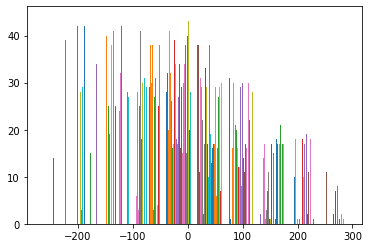

In [28]:
plt.hist(x = ytest.values-y_predict)

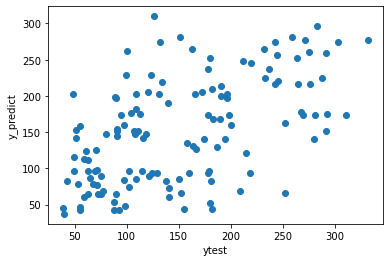

In [29]:
plt.scatter(ytest, y_predict)
plt.xlabel('ytest')
plt.ylabel('y_predict')
plt.show()

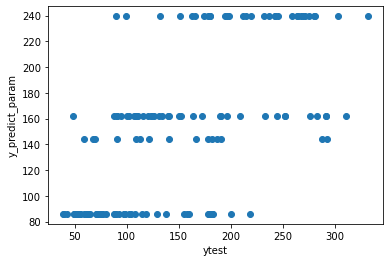

In [32]:
plt.scatter(ytest, y_predict_param)
plt.xlabel('ytest')
plt.ylabel('y_predict_param')
plt.show()

## Applying hyper-parameter tuning

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
model = DecisionTreeRegressor()

In [35]:
param_grid = {'criterion' : ['mse', 'mae'],
    'splitter' : ['best'],
    'max_depth' : np.arange(0, 20, 5),                      
    'min_samples_split' : np.arange(0, 100, 20),
}   

# max depth = 0, 5, 10, 15
# min sample split = 0 20 40 60 80

In [36]:
gscv_model = GridSearchCV(estimator=model, param_grid= param_grid)


In [37]:
gscv_model.fit(xtrain, ytrain)

C:\Users\Manju\Anaconda3\New folder\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Manju\Anaconda3\New folder\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Manju\Anaconda3\New folder\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\Manju\Anaconda3\New folder\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Manju\Anaconda3\New folder\lib\site-packages\sklearn\model_selection\_validati

C:\Users\Manju\Anaconda3\New folder\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Manju\Anaconda3\New folder\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Manju\Anaconda3\New folder\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\Manju\Anaconda3\New folder\lib\site-packages\sklearn\tree\_classes.py", line 286, in fit
    raise ValueError("max_depth must be greater than zero. ")
ValueError: max_depth must be greater than zero. 

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Manju\Anaconda3\New folder\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The sc

C:\Users\Manju\Anaconda3\New folder\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Manju\Anaconda3\New folder\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Manju\Anaconda3\New folder\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\Manju\Anaconda3\New folder\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Manju\Anaconda3\New folder\lib\site-packages\sklearn\model_selection\_validati

C:\Users\Manju\Anaconda3\New folder\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Manju\Anaconda3\New folder\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Manju\Anaconda3\New folder\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\Manju\Anaconda3\New folder\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Manju\Anaconda3\New folder\lib\site-packages\sklearn\model_selection\_validati

C:\Users\Manju\Anaconda3\New folder\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Manju\Anaconda3\New folder\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Manju\Anaconda3\New folder\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\Manju\Anaconda3\New folder\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Manju\Anaconda3\New folder\lib\site-packages\sklearn\model_selection\_validati

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': array([ 0,  5, 10, 15]),
                         'min_samples_split': array([ 0, 20, 40, 60, 80]),
                         'splitter': ['best']})

In [38]:
gscv_model.best_params_

{'criterion': 'mse',
 'max_depth': 10,
 'min_samples_split': 60,
 'splitter': 'best'}

In [39]:
gscv_model.best_score_

0.313663837731167

In [40]:
gscv_model.best_estimator_

DecisionTreeRegressor(max_depth=10, min_samples_split=60)

In [41]:
y_gscv_predict = gscv_model.predict(xtest)

In [42]:
# evaluate the model

print(metrics.mean_squared_error(ytest, y_gscv_predict))
print(metrics.mean_absolute_error(ytest, y_gscv_predict))
print(metrics.r2_score(ytest, y_gscv_predict))

4293.569461472066
52.58675410310748
0.2559597059827624


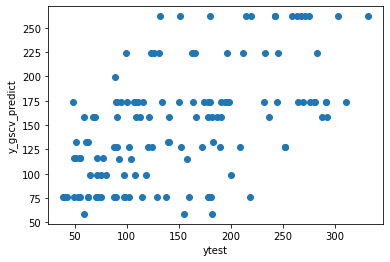

In [43]:
plt.scatter(ytest, y_gscv_predict)
plt.xlabel('ytest')
plt.ylabel('y_gscv_predict')
plt.show()

Thank You thats all for this 